# BASIC STATISTICS -1
## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

# 1.Descriptive Analytics for Numerical Columns

In [44]:
# Import the required libraries
# pandas - to perform stastical , operations (read,write,modify the data) in the dataset
# matplotLib - to perform visualization between the features in the dataset
# seaborn - to perform advanced visualization techniques on the dataset
# scipy - to calculate the probability of random variables
# numpy - to perform mathematical operations on the arrays\
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the dataset (sales_data_with_discounts.csv) file into the environment
df=pd.read_csv('sales_data_with_discounts.csv') # data file is called with relative path (dataset and python file located in the same loation) and it is stored in the variable "df"
df.info() # to give the detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [46]:
df.head() # accessing first 5 records

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [47]:
df.tail() # accessing last 5 records

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [48]:
df.shape # ( no.of rows,no.of columns)

(450, 13)

In [49]:
df.size # ( total number of elements (values))

5850

In [50]:
df.axes # it gives he no.of rows and column names

[RangeIndex(start=0, stop=450, step=1),
 Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
        'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
        'Discount Amount', 'Net Sales Value'],
       dtype='object')]

In [51]:
# calculating the mean,median,mode and standard deviation for the numerical columns
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [52]:
# calculating the mean of numerical columns in the dataset
df.mean(numeric_only=True)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [53]:
# calculating the median of numeical columns in the dataset
df.median(numeric_only=True)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [54]:
# calculating the mode of every column in dataset
df.mode().iloc[0]

Date                   01-04-2021
Day                      Thursday
SKU                           F01
City                            C
Volume                        3.0
BU                           FMCG
Brand                       Jeera
Model                Babaji Cream
Avg Price                   400.0
Total Sales Value         24300.0
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: object

# 

In [55]:
# calculating the standard deviation (sigma) of the numerical columns in dataset
df.std(numeric_only=True)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [56]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## DATA VISUALIZATION

## histograms for the numerical values

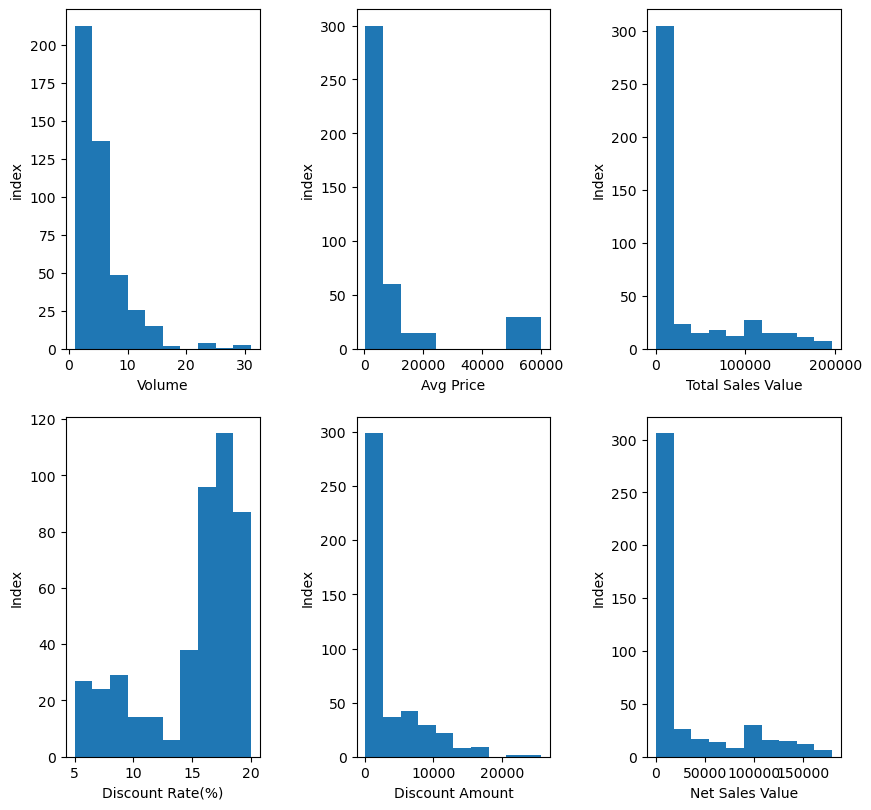

In [57]:
# plotting the Histogram for the numeric data in the dataset
# for Volume
fig=plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
plt.hist(df.Volume)
plt.xlabel('Volume')
plt.ylabel( 'index')
plt.subplot(3,3,2)
plt.hist(df['Avg Price'])
plt.xlabel('Avg Price')
plt.ylabel('index')
plt.subplot(3,3,3)
plt.hist(df['Total Sales Value'])
plt.xlabel('Total Sales Value')
plt.ylabel('Index')
plt.subplot(3,3,4)
plt.hist(df['Discount Rate (%)'])
plt.xlabel('Discount Rate(%)')
plt.ylabel('Index')
plt.subplot(3,3,5)
plt.hist(df['Discount Amount'])
plt.xlabel('Discount Amount')
plt.ylabel('Index')
plt.subplot(3,3,6)
plt.hist(df['Net Sales Value'])
plt.xlabel('Net Sales Value')
plt.ylabel('Index')
plt.subplots_adjust(wspace=0.5)
plt.show()

## Boxplots for the numerical values


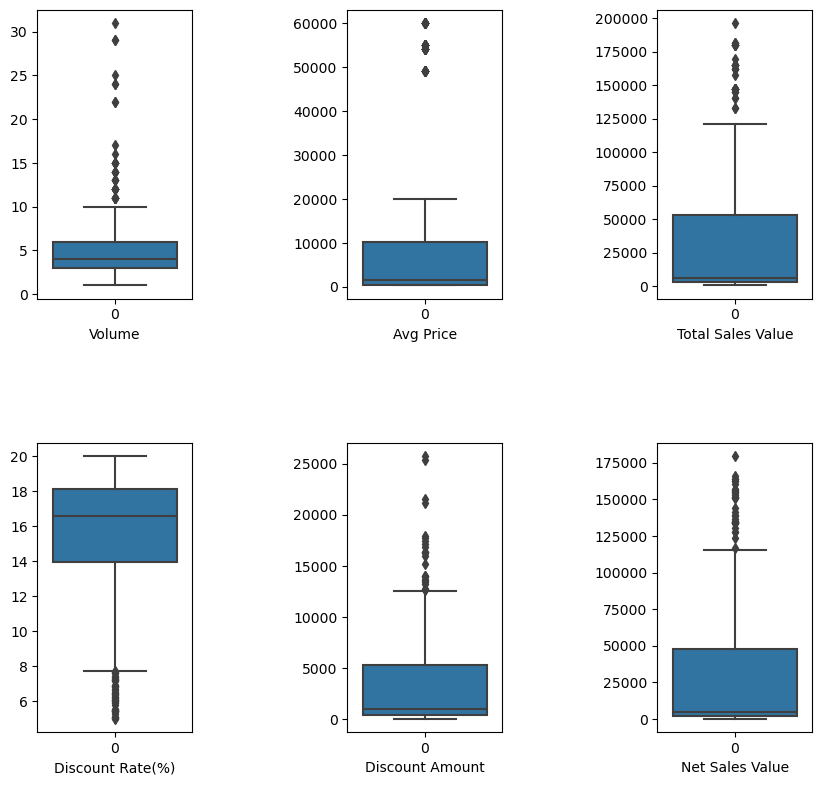

In [58]:
fig=plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
sns.boxplot(df.Volume)
plt.xlabel('Volume')
plt.subplot(3,3,2)
sns.boxplot(df['Avg Price'])
plt.xlabel('Avg Price')
plt.subplot(3,3,3)
sns.boxplot(df['Total Sales Value'])
plt.xlabel('Total Sales Value')
plt.subplot(3,3,4)
sns.boxplot(df['Discount Rate (%)'])
plt.xlabel('Discount Rate(%)')
plt.subplot(3,3,5)
sns.boxplot(df['Discount Amount'])
plt.xlabel('Discount Amount')
plt.subplot(3,3,6)
sns.boxplot(df['Net Sales Value'])
plt.xlabel('Net Sales Value')

plt.subplots_adjust(wspace=1,hspace=0.5)
plt.show()

# Barchart For Categorical Data

In [59]:
# First convert the Data type of the categorical data from object to categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [60]:
df.Date.dtype

dtype('O')

In [61]:
df.Date=pd.to_datetime(df.Date,errors='coerce')

In [62]:
df.Date.isnull().sum()

90

In [63]:
df.Date.dtype

dtype('<M8[ns]')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               360 non-null    datetime64[ns]
 1   Day                450 non-null    object        
 2   SKU                450 non-null    object        
 3   City               450 non-null    object        
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    object        
 6   Brand              450 non-null    object        
 7   Model              450 non-null    object        
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usag

In [65]:
df.Day=df.Day.astype('category')

In [66]:
df.SKU=df.SKU.astype('category')
df.City=df.City.astype('category')
df.BU=df.BU.astype('category')
df.Brand=df.Brand.astype('category')
df.Model=df.Model.astype('category')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               360 non-null    datetime64[ns]
 1   Day                450 non-null    category      
 2   SKU                450 non-null    category      
 3   City               450 non-null    category      
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    category      
 6   Brand              450 non-null    category      
 7   Model              450 non-null    category      
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(3)
memory us

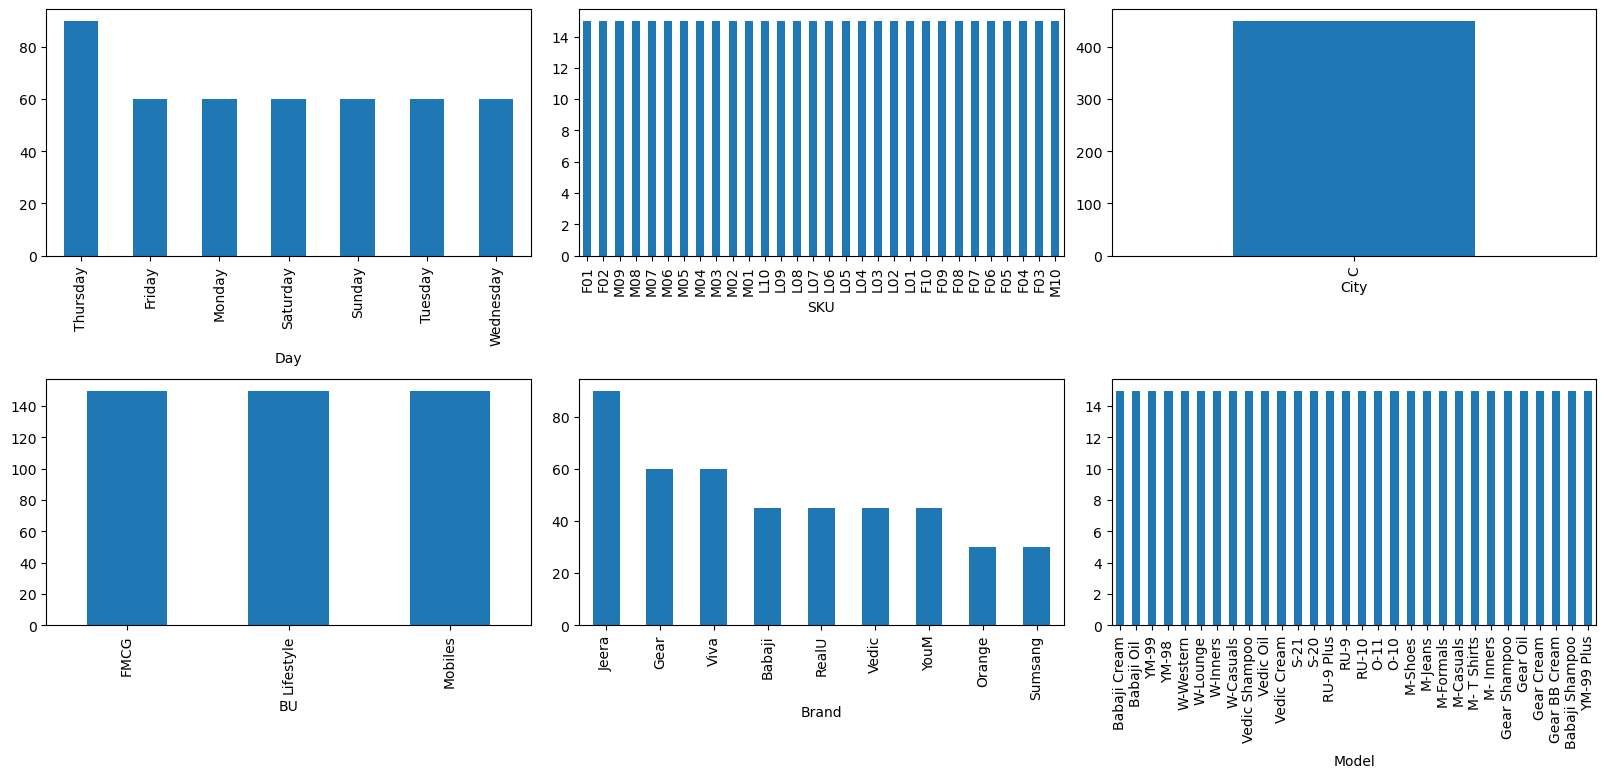

In [68]:
fig=plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df.Day.value_counts().plot(kind='bar')

plt.subplot(2,3,2)
df.SKU.value_counts().plot(kind='bar')

plt.subplot(2,3,3)
df.City.value_counts().plot(kind='bar')

plt.subplot(2,3,4)
df.BU.value_counts().plot(kind='bar')

plt.subplot(2,3,5)
df.Brand.value_counts().plot(kind='bar')

plt.subplot(2,3,6)
df.Model.value_counts().plot(kind='bar')

plt.subplots_adjust(hspace=0.5,wspace=0.1)


<Axes: xlabel='Date'>

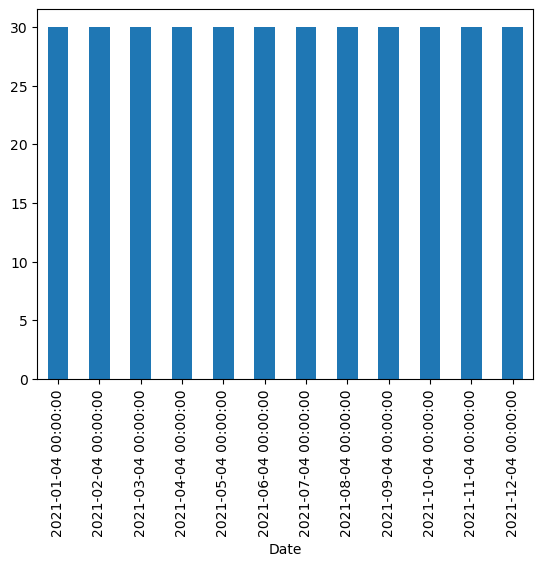

In [69]:
df.Date.value_counts().plot(kind='bar')

In [70]:
# standardization:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               360 non-null    datetime64[ns]
 1   Day                450 non-null    category      
 2   SKU                450 non-null    category      
 3   City               450 non-null    category      
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    category      
 6   Brand              450 non-null    category      
 7   Model              450 non-null    category      
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(3)
memory us

In [71]:
# fill the date column with the mode
df.Date=df.Date.fillna(df.Date.mode().iloc[0])

In [72]:
df.Date.isnull().sum()

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               450 non-null    datetime64[ns]
 1   Day                450 non-null    category      
 2   SKU                450 non-null    category      
 3   City               450 non-null    category      
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    category      
 6   Brand              450 non-null    category      
 7   Model              450 non-null    category      
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(3)
memory us

In [74]:
# defining the standardization function
def get_standardization(x):
    return ((x-x.mean())/x.std())
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).apply(get_standardization)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               450 non-null    datetime64[ns]
 1   Day                450 non-null    category      
 2   SKU                450 non-null    category      
 3   City               450 non-null    category      
 4   Volume             450 non-null    float64       
 5   BU                 450 non-null    category      
 6   Brand              450 non-null    category      
 7   Model              450 non-null    category      
 8   Avg Price          450 non-null    float64       
 9   Total Sales Value  450 non-null    float64       
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: category(6), datetime64[ns](1), float64(6)
memory usage: 30.9 

In [76]:
df.describe()

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,2021-05-17 04:48:00,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
min,2021-01-04 00:00:00,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,2021-01-04 00:00:00,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,2021-05-04 00:00:00,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2021-09-04 00:00:00,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,2021-12-04 00:00:00,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [77]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2021-01-04,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,2021-01-04,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,2021-01-04,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,2021-01-04,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,2021-01-04,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [79]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  450 non-null    datetime64[ns]
 1   Volume                450 non-null    float64       
 2   Avg Price             450 non-null    float64       
 3   Total Sales Value     450 non-null    float64       
 4   Discount Rate (%)     450 non-null    float64       
 5   Discount Amount       450 non-null    float64       
 6   Net Sales Value       450 non-null    float64       
 7   Day_Monday            450 non-null    int32         
 8   Day_Saturday          450 non-null    int32         
 9   Day_Sunday            450 non-null    int32         
 10  Day_Thursday          450 non-null    int32         
 11  Day_Tuesday           450 non-null    int32         
 12  Day_Wednesday         450 non-null    int32         
 13  SKU_F02             